<a href="https://colab.research.google.com/github/fernandeskelvin/projeto_analise_dados/blob/main/projeto_analise_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Criar DataFrame**
Ler arquivo csv com pandas

In [ ]:
# carregando dados
df = pd.read_csv('https://raw.githubusercontent.com/fernandeskelvin/projeto_analise_dados/main/dataset.csv')

# mostrar primeiras linhas do dataframe
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [ ]:
print(f'Base de dados possui', len(df), 'linhas')

Base de dados possui 9700 linhas


##**As 5 maiores vendas**

Identificar os cinco dias com maiores totais de vendas, podemos compreender os eventos ou fatores que impulsionaram esses resultados. A análise pode ajudar a empresa a reconhecer tendências sazonais.







In [46]:
# calcular o total de vendas pela data do pedido
vendas_dia = df.groupby('Data_Pedido')['Valor_Venda'].sum()

# ordenar valores por ordem decrescente, resetar o index e mostra os 5 primeiros resultados
vendas_dia = vendas_dia.sort_values(ascending=False).reset_index().head()

vendas_dia

,Data_Pedido,Valor_Venda
0,18/03/2015,28106.716
1,02/10/2017,18452.972
2,22/10/2018,15158.877
3,23/03/2018,14816.068
4,08/09/2015,14228.428


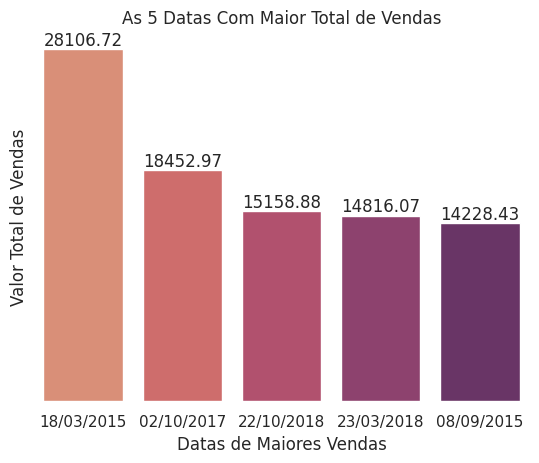

In [47]:
# resetar index e ordenar as top 5 datas
vendas_dia = df.groupby('Data_Pedido')['Valor_Venda'].sum().sort_values(ascending=False).reset_index().round(2).head()

# plotar gráfico de barra utilizando seaborn
sns.barplot(data = vendas_dia,
            y = 'Valor_Venda',
            x = 'Data_Pedido',
            palette='flare').set(title = 'As 5 Datas Com Maior Total de Vendas')

plt.xlabel('Datas de Maiores Vendas')
plt.ylabel('Valor Total de Vendas')

# plotar rótulo com valores de vendas
for i in range(len(vendas_dia['Valor_Venda'])):
    plt.text(i, vendas_dia['Valor_Venda'][i], str(vendas_dia['Valor_Venda'][i]), ha='center', va='bottom')

# remover escala eixo y
plt.yticks([])
plt.box(False)
plt.show()

##**Total de vendas por estados**
A analise de total de vendas por estado fornece uma visão abrangente da distribuição geográfica das vendas. A métrica ajuda a identificar os estados mais lucrativos e aqueles que podem precisar de estratégias de vendas e marketing.

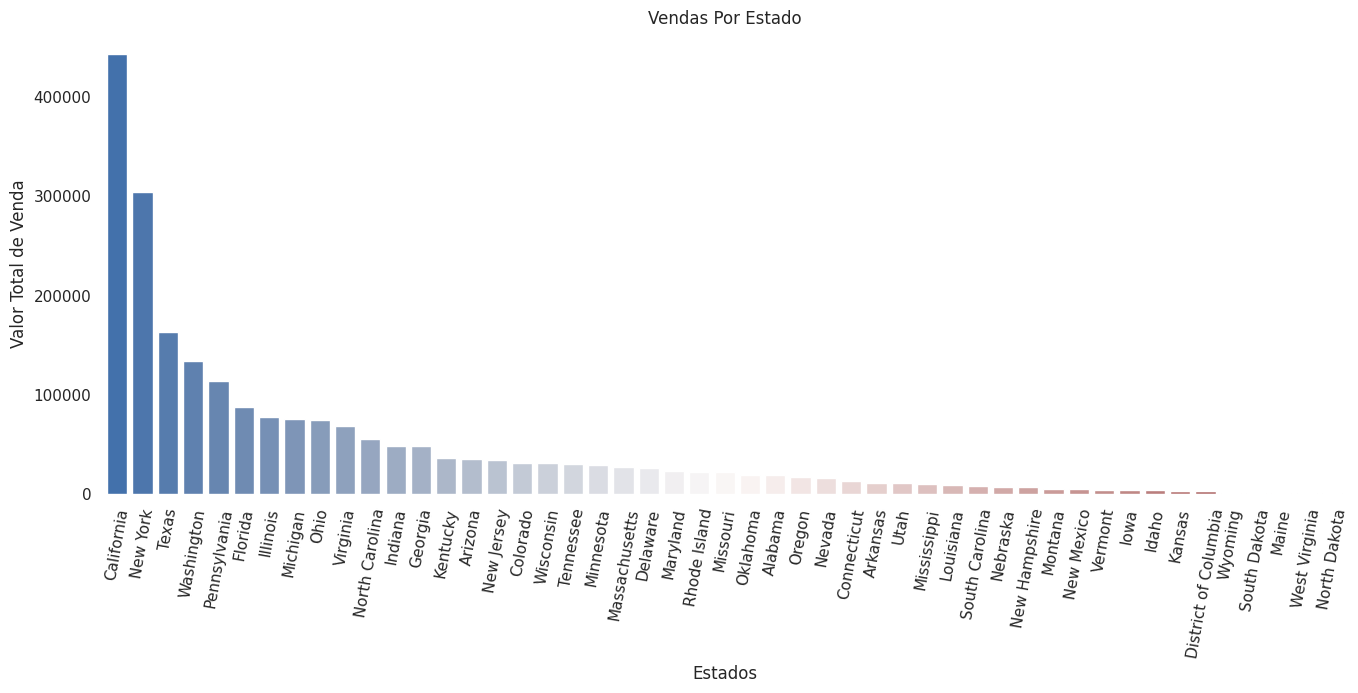

In [48]:
vendas_estados = df.groupby('Estado')['Valor_Venda'].sum().sort_values(ascending=False).reset_index()

# Plot gráfico
plt.figure(figsize = (16, 6))
sns.barplot(data = vendas_estados,
            y = 'Valor_Venda',
            x = 'Estado', palette='vlag').set(title = 'Vendas Por Estado')

plt.xlabel('Estados')

# rotacionar rótulo do eixo x para melhor visualização
plt.xticks(rotation = 80)
plt.ylabel('Valor Total de Venda')
plt.box(False)
plt.show()

##**As 10 Cidades com Maior Total de Vendas**
Essas cidades se destacam como importantes centros de negócios e mercado para a empresa.

In [ ]:
# calcular somatorio de total de vendas por cidades, ordenar e mostrar 10 primeiros resultados
dados_cidades = df.groupby('Cidade')['Valor_Venda'].sum().sort_values(ascending=False).head(10).reset_index()

dados_cidades

,Cidade,Valor_Venda
0,New York City,251749.2190
1,Los Angeles,171654.6330
2,Seattle,114725.4780
3,San Francisco,107489.9520
4,Philadelphia,107197.8030
5,Houston,61590.1868
6,San Diego,47458.3790
7,Chicago,46974.3430
8,Jacksonville,44713.1830
9,Detroit,42446.9440


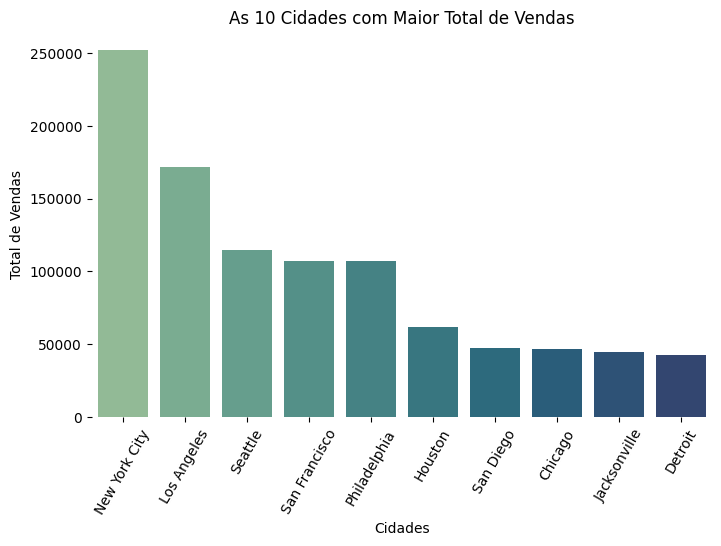

In [ ]:
# Plot gráfico
plt.figure(figsize = (8, 5))
sns.barplot(data = dados_cidades,
            x = 'Cidade',
            y = 'Valor_Venda',
            palette='crest').set(title= 'As 10 Cidades com Maior Total de Vendas')

plt.xlabel('Cidades')
plt.xticks(rotation=60)
plt.ylabel('Total de Vendas')
plt.box(False)

plt.show()

##**Análise do total de vendas por segmento ao longo dos anos:**

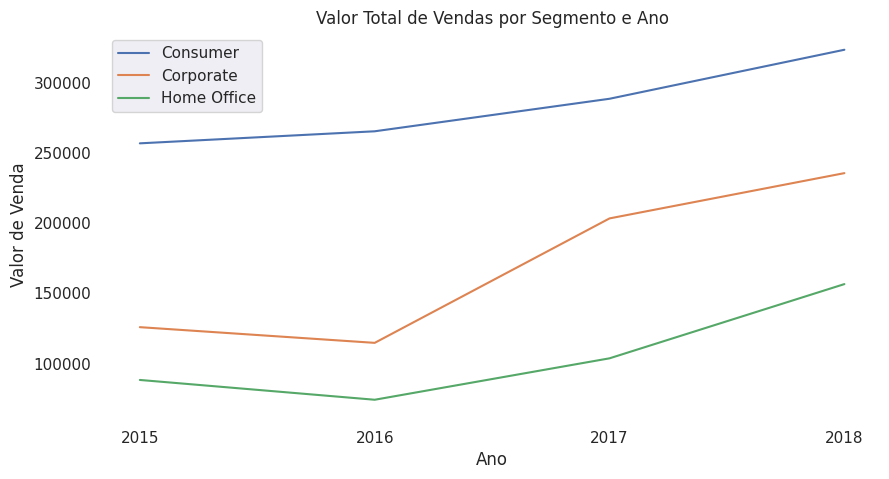

In [49]:
# criar uma nova coluna e inserir os dados dos anos extraidos da coluna Data_Pedido
df['Ano'] = df['Data_Pedido'].str.split('/').str[2]

# Agrupe os dados por segmento e ano e calcule a soma dos valores de venda
dados_segmentos = df[['Segmento', 'Ano', 'Valor_Venda']].groupby(['Segmento', 'Ano']).sum().reset_index()

# array com segmentos
segmentos = dados_segmentos['Segmento'].unique()

plt.figure(figsize=(10, 5))

# traçar gráfico para cada segmento
for segmento in segmentos:
    valores_segmentos = dados_segmentos[dados_segmentos['Segmento'] == segmento]
    plt.plot(valores_segmentos['Ano'], valores_segmentos['Valor_Venda'], label=segmento)

plt.xlabel('Ano')
plt.ylabel('Valor de Venda')
plt.title('Valor Total de Vendas por Segmento e Ano')
plt.legend()


plt.box(False)
plt.show()

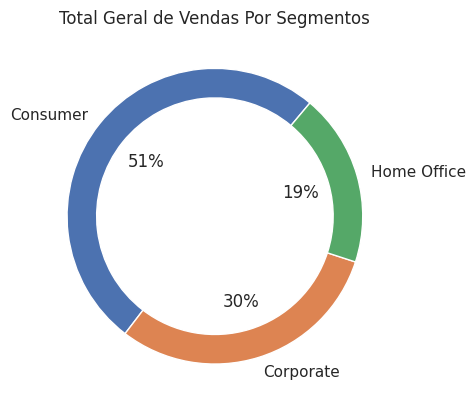

In [51]:
# calcular somatorio de total de vendas por segmento
dados_segmentos_geral = df.groupby('Segmento')['Valor_Venda'].sum().sort_values(ascending=False).reset_index()

plt.pie(dados_segmentos_geral['Valor_Venda'],
        labels=dados_segmentos_geral['Segmento'],
        autopct='%.0f%%',
        startangle = 50,
        wedgeprops=dict(width=0.2, edgecolor='w'))

plt.title('Total Geral de Vendas Por Segmentos')
plt.show()

Com base nos dados analisados, podemos observar que apenas o segmento Consumer registrou crescimento no ano de 2016. No ano seguinte, o segmento Corporate obteve o desempenho mais destacado. No último ano, todos os segmentos apresentaram resultados positivos, com aumentos nas vendas totais de magnitude semelhantes.

Durante todo o período analisado, o segmento Consumer representou 51% do total de vendas.

##**Média de Vendas Por Segmento, Por Ano e Por Mês**

<Figure size 1200x400 with 0 Axes>

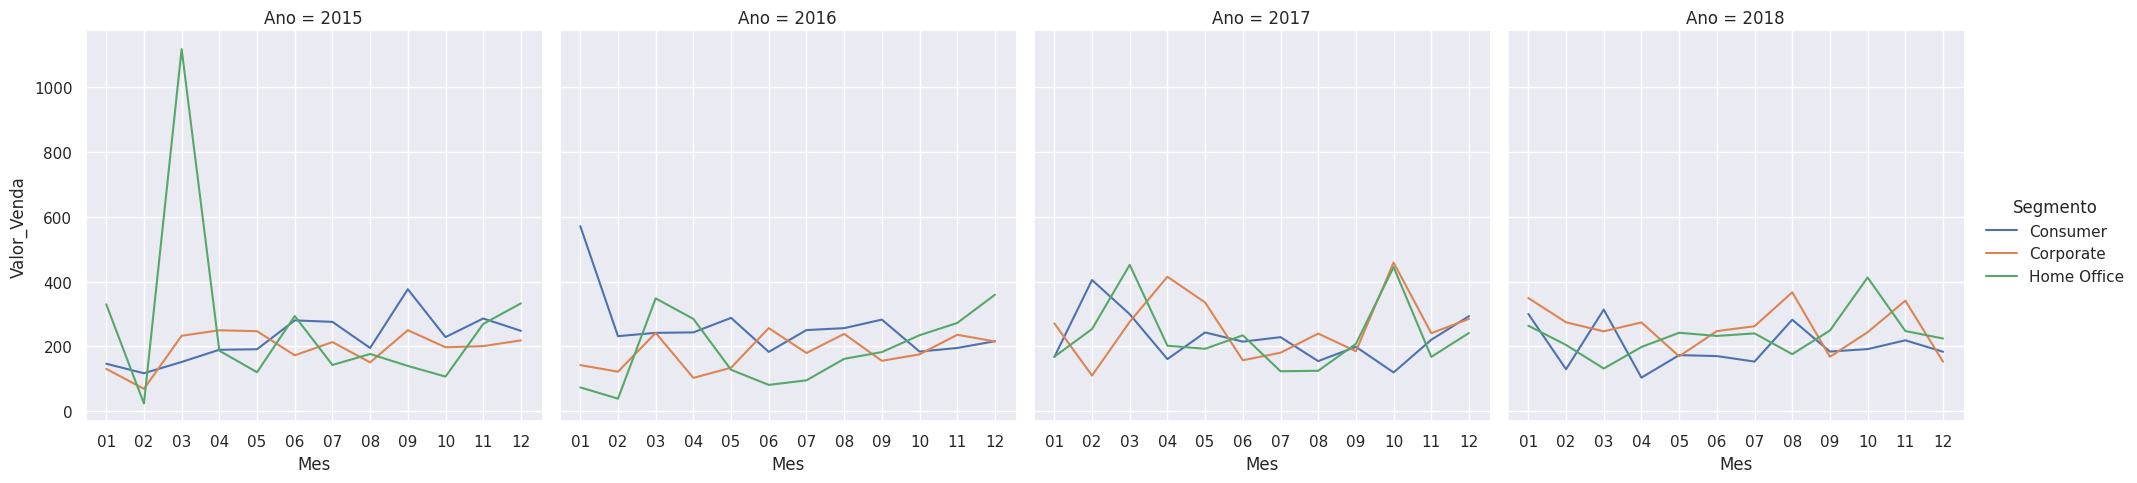

In [52]:
# criar uma nova coluna e inserir os dados de meses extraidos da coluna Data_Pedido
df['Mes'] = df['Data_Pedido'].str.split('/').str[1]

# Agrupar segmento, ano e mês, depois calcular media e resetar index
media_segmentos = df[['Segmento', 'Valor_Venda','Ano', 'Mes']].groupby(['Segmento', 'Ano', 'Mes']).mean().reset_index()

# gráfico de media em relação aos meses e anos, de cada segmento
plt.figure(figsize = (12,4))

sns.set()

figl = sns.relplot(kind='line',
                   data=media_segmentos,
                   y='Valor_Venda',
                   x='Mes',
                   hue='Segmento',
                   col = 'Ano',
                   col_wrap=4)

plt.show()

##**Total de Vendas Por Categoria e SubCategoria**
A analise com foco nas 12 principais subcategorias busca examinar os produtos mais bem-sucedidos em vendas de cada segmento. Esses dados são essenciais para compreender os pontos fortes da empresa, orientar o planejamento e criação de novos produtos similares, afim de atender às demandas do mercado. Essa análise oferece informações valiosas para o crescimento e a estratégia da empresa.


In [56]:
# agrupar categorias e subcategorias por total de venda, ordenar as top 12 e atribuir à variavel
dados_catg_subcatg = df[['Categoria', 'Valor_Venda','SubCategoria']].groupby(['Categoria', 'SubCategoria']).sum().sort_values('Valor_Venda', ascending=False).head(12)

# ordenar categoria em ordem alfabetica e transforma coluna Valor_Venda em número inteiro
dados_catg_subcatg = dados_catg_subcatg[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()

# criar data frame apenas com total de venda das categorias
dados_categorias = dados_catg_subcatg.groupby('Categoria')['Valor_Venda'].sum().reset_index()

In [57]:
# configurações do gráfico

# listas de cores para categorias
cores_categorias = ['#01B8AA','#FFC000','#404040']

# listas de cores para subcategorias
cores_subcategorias = ['#99e2dd','#99e2dd','#99e2dd','#99e2dd',
                       '#ffdf7f','#ffdf7f','#ffdf7f','#ffdf7f',
                       '#b2b2b2','#b2b2b2','#b2b2b2','#b2b2b2']

# rótulos de porcentagens
rotulo_subcategorias = lambda p: '{:.1f}% \n({:,.0f})'.format(p, (p / 100) * sum(dados_catg_subcatg['Valor_Venda']))
rotulos_categorias = [(f'{dados_categorias["Categoria"][i]}:\n {round((itens / dados_categorias["Valor_Venda"].sum()) * 100, 1)}%')
                for i, itens in enumerate(dados_categorias['Valor_Venda'])]

# fonte para letras de rótulo
fonte = {'fontsize': 10,'fontweight': 'normal', 'color': 'black'}

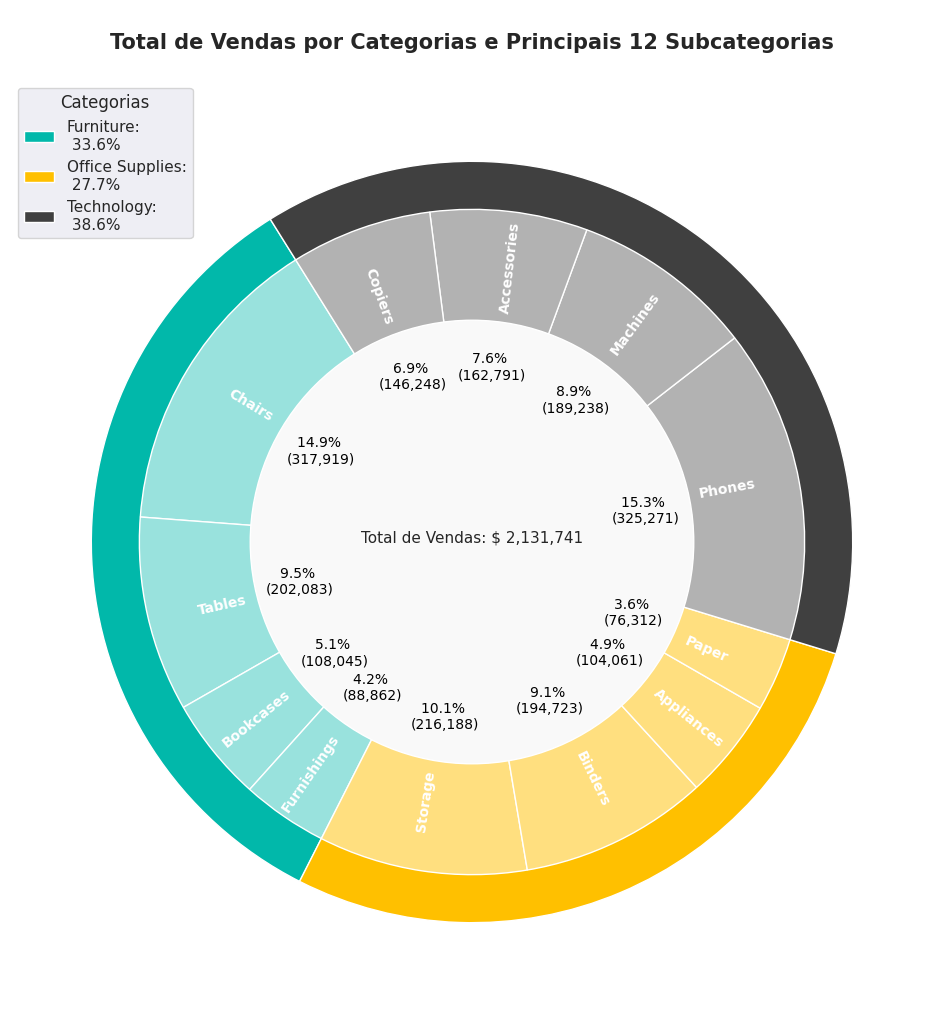

In [58]:
fig, ax = plt.subplots(figsize = (16,12))

# gráfico de pizza das categorias
pl = ax.pie(dados_categorias['Valor_Venda'],
            radius = 1.03,
            labels = None,
            wedgeprops = dict(edgecolor = 'white'),
            startangle = 122,
            colors = cores_categorias)

# gráfico de pizza das sucategorias
pl = ax.pie(dados_catg_subcatg['Valor_Venda'],
            radius = 0.9,
            labels = dados_catg_subcatg['SubCategoria'],
            wedgeprops = dict(edgecolor = 'white'),
            labeldistance = 0.69,
            startangle = 122,
            colors = cores_subcategorias,
            pctdistance = 0.53,
            textprops=fonte,
            autopct=rotulo_subcategorias,
            rotatelabels = True)

# colocar texto de subcategorias 'branco' e negrito
for text in pl[1]:
    text.set_color('white')
    text.set_fontweight('bold')

# limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.60, fc = '#f9f9f9')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# formatar total de vendas
total_vendas_format = int('${:,.0f}'.format(sum(dados_categorias['Valor_Venda'])).replace('$', '').replace(',', ''))

# Adiciona a anotação
plt.title('\nTotal de Vendas por Categorias e Principais 12 Subcategorias\n', fontsize=15, fontweight='bold')
plt.legend(rotulos_categorias, loc='upper left', title='Categorias')
plt.annotate(text='Total de Vendas: ' + '$ {:,.0f}'.format(total_vendas_format), xy=(-0.3, 0), fontsize=11)
plt.show()